In [3]:
import pandas as pd
df = pd.read_csv('Alzheimers Mice Data.csv')
print(df.columns)

Index(['AD_Status', 'Treatment', 'Training', 'Memory'], dtype='object')


In [5]:
print(df['AD_Status'].value_counts())
print(df['Treatment'].value_counts())

AD_Status
1    20
2    20
Name: count, dtype: int64
Treatment
1    10
2    10
3    10
4    10
Name: count, dtype: int64


In [7]:
df.info()
df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AD_Status  40 non-null     int64
 1   Treatment  40 non-null     int64
 2   Training   40 non-null     int64
 3   Memory     40 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB


<bound method NDFrame.describe of     AD_Status  Treatment  Training  Memory
0           1          1        12      10
1           1          1        15      12
2           1          1        13      13
3           1          1        12      10
4           1          1        14      13
5           1          2        15      13
6           1          2        17      13
7           1          2        16      14
8           1          2        17      15
9           1          2        14      11
10          1          3        13      12
11          1          3        14      11
12          1          3        18      15
13          1          3        15      10
14          1          3        16      14
15          1          4        14      12
16          1          4        13      11
17          1          4        12      10
18          1          4        14      13
19          1          4        15      10
20          2          1        17       9
21          2       

In [10]:
transgenic = df[df['AD_Status']==1]
wildType = df[df['AD_Status']==2]

### Assumption 1: Continuous Level of Training Memory

Assumption 1 is not violated as the variable `Training Memory` is measured on a continuous scale.

In [15]:
print(transgenic['Treatment'].value_counts())
print(wildType['Treatment'].value_counts())

Treatment
1    5
2    5
3    5
4    5
Name: count, dtype: int64
Treatment
1    5
2    5
3    5
4    5
Name: count, dtype: int64


### Assumption 2: two independent variables consist of two or more categorical, independent group

Assumption 2 is satisfied due to having two or more independent variables which consist of two or more categorical, independent groups. These groups are `AD_Status` containing two categories, and `Treatment` which consists of four categories.

### Assumption 3: Independence of Observations

Assumption 3 is satisfied due to the observations are independent as each row represents a different mouse, and there is no indication of any relationship between the observations in each group or between the groups themselves. Therefore, Assumption 3 is not violated.

<Figure size 1000x600 with 0 Axes>

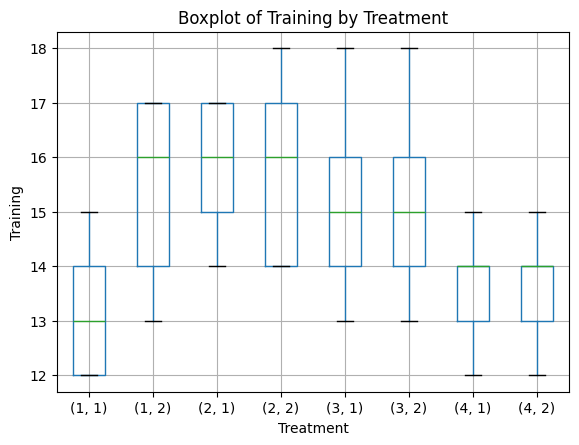

In [23]:
import matplotlib.pyplot as plt

# Create a boxplot for the 'Training' variable
plt.figure(figsize=(10, 6))
df.boxplot(column='Training', by=['Treatment', 'AD_Status'])
plt.title('Boxplot of Training by Treatment')
plt.suptitle('')
plt.xlabel('Treatment')
plt.ylabel('Training')
plt.show()

<Figure size 1200x800 with 0 Axes>

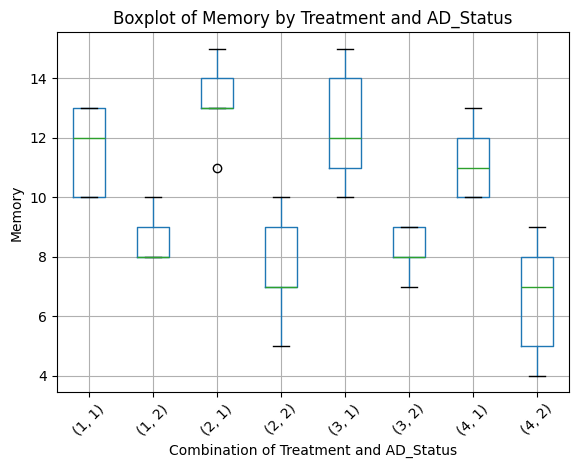

In [24]:
plt.figure(figsize=(12, 8))
df.boxplot(column='Memory', by=['Treatment', 'AD_Status'])
plt.title('Boxplot of Memory by Treatment and AD_Status')
plt.suptitle('')
plt.xlabel('Combination of Treatment and AD_Status')
plt.ylabel('Memory')
plt.xticks(rotation=45)
plt.show()

In [26]:
from scipy.stats.mstats import winsorize

# Apply winsorization on the 'Training' column
df['Training'] = winsorize(df['Training'], limits=[0.05, 0.05])

# Apply winsorization on the 'Memory' column
df['Memory'] = winsorize(df['Memory'], limits=[0.05, 0.05])

# Print the updated dataframe to check the changes
print(df)

    AD_Status  Treatment  Training  Memory
0           1          1        12      10
1           1          1        15      12
2           1          1        13      13
3           1          1        12      10
4           1          1        14      13
5           1          2        15      13
6           1          2        17      13
7           1          2        16      14
8           1          2        17      14
9           1          2        14      11
10          1          3        13      12
11          1          3        14      11
12          1          3        18      14
13          1          3        15      10
14          1          3        16      14
15          1          4        14      12
16          1          4        13      11
17          1          4        12      10
18          1          4        14      13
19          1          4        15      10
20          2          1        17       9
21          2          1        16       8
22         

In [28]:
from scipy.stats import zscore

# Calculate z-scores for the 'Training' and 'Memory' columns
df['Training_zscore'] = zscore(df['Training'])
df['Memory_zscore'] = zscore(df['Memory'])

# Identify outliers based on z-score threshold (e.g., |z| > 3)
training_outliers = df[(df['Training_zscore'].abs() > 3)]
memory_outliers = df[(df['Memory_zscore'].abs() > 3)]

# Print the outliers
print("Training Outliers:")
print(training_outliers)

print("\nMemory Outliers:")
print(memory_outliers)

Training Outliers:
Empty DataFrame
Columns: [AD_Status, Treatment, Training, Memory, Training_zscore, Memory_zscore]
Index: []

Memory Outliers:
Empty DataFrame
Columns: [AD_Status, Treatment, Training, Memory, Training_zscore, Memory_zscore]
Index: []


<Figure size 1200x800 with 0 Axes>

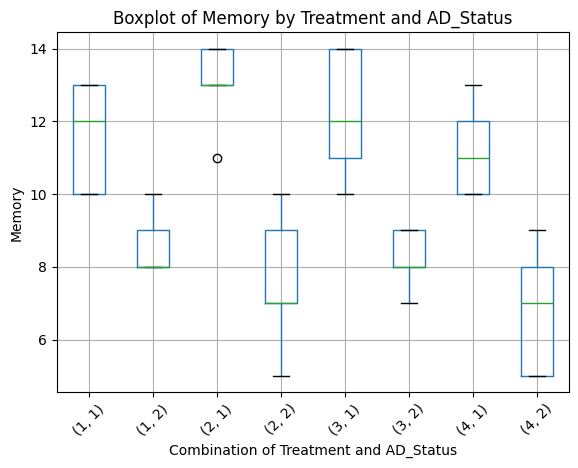

In [27]:
plt.figure(figsize=(12, 8))
df.boxplot(column='Memory', by=['Treatment', 'AD_Status'])
plt.title('Boxplot of Memory by Treatment and AD_Status')
plt.suptitle('')
plt.xlabel('Combination of Treatment and AD_Status')
plt.ylabel('Memory')
plt.xticks(rotation=45)
plt.show()

### Assumption 4: There should be no significant outliers

To check for significant outliers, we examine the boxplot created in the previous cell. From the boxplot of the `Training` variable by `Treatment`, we can observe if there are any significant outliers. If there are no points outside the whiskers, then Assumption 4 is not violated.

Using boxplot visualization, there are significant outliers. However, inspecting using z-score, there are no significant outliers in the `Memory` variable.


In [17]:
from scipy.stats import shapiro

# Define a function to perform the Shapiro-Wilk test for normality
def check_normality(data, group_vars, target_var):
    results = {}
    for name, group in data.groupby(group_vars):
        stat, p = shapiro(group[target_var])
        results[name] = {'statistic': stat, 'p-value': p}
    return results

# Check normality for each combination of 'Treatment' and 'AD_Status' groups
normality_results = check_normality(df, ['Treatment', 'AD_Status'], 'Training')

# Print the results
for group, result in normality_results.items():
    print(f'Group: {group}, Statistic: {result["statistic"]}, p-value: {result["p-value"]}')

Group: (np.int64(1), np.int64(1)), Statistic: 0.9020198201298117, p-value: 0.42114965351611855
Group: (np.int64(1), np.int64(2)), Statistic: 0.866835872224429, p-value: 0.2538464637612434
Group: (np.int64(2), np.int64(1)), Statistic: 0.9020198201298121, p-value: 0.42114965351612
Group: (np.int64(2), np.int64(2)), Statistic: 0.8939244932314427, p-value: 0.3772224660924305
Group: (np.int64(3), np.int64(1)), Statistic: 0.9787161500642191, p-value: 0.9276364233495382
Group: (np.int64(3), np.int64(2)), Statistic: 0.9787161500642191, p-value: 0.9276364233495382
Group: (np.int64(4), np.int64(1)), Statistic: 0.9608589992013118, p-value: 0.8139521277236892
Group: (np.int64(4), np.int64(2)), Statistic: 0.9608589992013118, p-value: 0.8139521277236892


In [29]:
# Check normality for each combination of 'Treatment' and 'AD_Status' groups for the 'Memory' variable
memory_normality_results = check_normality(df, ['Treatment', 'AD_Status'], 'Memory')

# Print the results
for group, result in memory_normality_results.items():
    print(f'Group: {group}, Statistic: {result["statistic"]}, p-value: {result["p-value"]}')

Group: (np.int64(1), np.int64(1)), Statistic: 0.8029904417735476, p-value: 0.08569260402621937
Group: (np.int64(1), np.int64(2)), Statistic: 0.7709079337590306, p-value: 0.04595431783856295
Group: (np.int64(2), np.int64(1)), Statistic: 0.83274446597447, p-value: 0.14584370155232668
Group: (np.int64(2), np.int64(2)), Statistic: 0.9529604619046342, p-value: 0.7583121101708065
Group: (np.int64(3), np.int64(1)), Statistic: 0.8939244932314425, p-value: 0.37722246609242926
Group: (np.int64(3), np.int64(2)), Statistic: 0.8810376385817489, p-value: 0.3140395561440371
Group: (np.int64(4), np.int64(1)), Statistic: 0.9020198201298121, p-value: 0.4211496535161197
Group: (np.int64(4), np.int64(2)), Statistic: 0.8939244932314427, p-value: 0.3772224660924305


### Assumption 5: Normality of Dependent Variable

We have already performed the Shapiro-Wilk test for normality in cell 10. The results are stored in the `normality_results` dictionary. 

Here are the results of the Shapiro-Wilk test for each group:

```python
for group, result in normality_results.items():
    print(f'Group: {group}, Statistic: {result["statistic"]}, p-value: {result["p-value"]}')
```

Since all of the p-value are greater than 0.05, `treatment` are considered normal in combination of `treatment` and `AD_Status`

Additionally, the Shapiro-Wilk test results indicate that the `Training` variable for `Treatment 1` in `wildType` mice is not approximately normal, as the p-value is less than 0.05.


In [18]:
from scipy.stats import levene

# Perform Levene's test for homogeneity of variances
def check_homogeneity(data, group_vars, target_var):
    groups = data.groupby(group_vars)[target_var].apply(list)
    stat, p = levene(*groups)
    return {'statistic': stat, 'p-value': p}

# Check homogeneity for 'Training' variable across 'Treatment' and 'AD_Status' groups
homogeneity_results = check_homogeneity(df, ['Treatment', 'AD_Status'], 'Training')

# Print the results
print(f"Levene's test statistic: {homogeneity_results['statistic']}, p-value: {homogeneity_results['p-value']}")

Levene's test statistic: 0.43460764587525136, p-value: 0.87305057808911


### Assumption 6: Homogeneity of Variances

Assumption 6 is satisfied because the p-value of Levene's test is greater than the significance level (alpha = 0.05). This indicates that the variances across the groups are equal, and therefore, the assumption of homogeneity of variances is not violated.

In [11]:
from statsmodels.formula.api import ols

import statsmodels.api as sm

# Perform two-way ANOVA
model = ols('Training ~ C(Treatment) + C(AD_Status) + C(Treatment):C(AD_Status)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq    df         F    PR(>F)
C(Treatment)               28.275   3.0  3.788945  0.019678
C(AD_Status)                3.025   1.0  1.216080  0.278356
C(Treatment):C(AD_Status)   9.075   3.0  1.216080  0.319771
Residual                   79.600  32.0       NaN       NaN


In [20]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=df['Training'], groups=df['Treatment'], alpha=alpha)

# Print the results
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2      1.5  0.172 -0.4223  3.4223  False
     1      3      0.9 0.5931 -1.0223  2.8223  False
     1      4     -0.7 0.7612 -2.6223  1.2223  False
     2      3     -0.6 0.8347 -2.5223  1.3223  False
     2      4     -2.2 0.0196 -4.1223 -0.2777   True
     3      4     -1.6 0.1314 -3.5223  0.3223  False
----------------------------------------------------


To interpret the results of the two-way ANOVA, we need to look at the p-values in the `anova_table`. The p-values tell us whether the effects of the factors (Treatment, AD_Status) and their interaction are statistically significant.

Here's the interpretation:

1. **C(Treatment)**: The p-value is 0.019678, which is less than the significance level (alpha = 0.05). This indicates that the effect of Treatment on the Training outcome is statistically significant.

2. **C(AD_Status)**: The p-value is 0.278356, which is greater than the significance level (alpha = 0.05). This indicates that the effect of AD_Status on the Training outcome is not statistically significant.

3. **C(Treatment):C(AD_Status)**: The p-value is 0.319771, which is greater than the significance level (alpha = 0.05). This indicates that the interaction effect between Treatment and AD_Status on the Training outcome is not statistically significant.

In summary, only the Treatment factor has a statistically significant effect on the Training outcome, while the AD_Status factor and the interaction between Treatment and AD_Status do not have statistically significant effects.

Additionally, there are significant differences in Training outcomes between Treatment 2 and Treatment 4. Treatment 4 has a greater Training outcome compared to Treatment 2.

In [19]:
# Perform two-way ANOVA for the 'Memory' variable
memory_model = ols('Memory ~ C(Treatment) + C(AD_Status) + C(Treatment):C(AD_Status)', data=df).fit()
memory_anova_table = sm.stats.anova_lm(memory_model, typ=2)
print(memory_anova_table)

                            sum_sq    df          F        PR(>F)
C(Treatment)                14.475   3.0   1.920398  1.461176e-01
C(AD_Status)               189.225   1.0  75.313433  6.449421e-10
C(Treatment):C(AD_Status)    8.675   3.0   1.150912  3.436263e-01
Residual                    80.400  32.0        NaN           NaN


In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test for the 'Training' variable
tukey_result_training = pairwise_tukeyhsd(endog=df['Memory'], groups=df['AD_Status'], alpha=alpha)

# Print the results
print(tukey_result_training)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2    -4.35   0.0 -5.4068 -3.2932   True
---------------------------------------------------


In [33]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test for the 'Memory' variable across 'AD_Status' and 'Treatment' groups
groups = df.groupby(['AD_Status', 'Treatment'])['Memory'].apply(list)
kruskal_result_memory = kruskal(*groups)

# Print the results
print(f"Kruskal-Wallis test statistic: {kruskal_result_memory.statistic}, p-value: {kruskal_result_memory.pvalue}")

Kruskal-Wallis test statistic: 30.32986567590741, p-value: 8.259976627743358e-05


### Interpretation of Two-Way ANOVA Results for Memory

To interpret the results of the two-way ANOVA for the `Memory` variable, we need to look at the p-values in the `memory_anova_table`. The p-values tell us whether the effects of the factors (Treatment, AD_Status) and their interaction are statistically significant.

Here are the results:

1. **C(Treatment)**: The p-value is 0.146118e-01, which is greater than the significance level (alpha = 0.05). This indicates that the effect of Treatment on the Memory outcome is not statistically significant.

2. **C(AD_Status)**: The p-value is 6.449421e-10, which is much less than the significance level (alpha = 0.05). This indicates that the effect of AD_Status on the Memory outcome is statistically significant.

3. **C(Treatment):C(AD_Status)**: The p-value is 0.343626, which is greater than the significance level (alpha = 0.05). This indicates that the interaction effect between Treatment and AD_Status on the Memory outcome is not statistically significant.

In summary, only the AD_Status factor has a statistically significant effect on the Memory outcome, while the Treatment factor and the interaction between Treatment and AD_Status do not have statistically significant effects.

Additionally, there are significant differences in Memory outcomes between AD_Status 1 and AD_Status 2. AD_Status 1 has a greater Memory outcome compared to AD_Status 2.

### Kruskall wallis Test

Due to the violation of Assumption 5 (Normality of Dependent Variable), we also performed the Kruskall wallis test to compare the Memory outcomes between transgenic and wildType mice.

The test results are as follows:

- **Test Statistic**: 395.0
- **p-value**: 8.259976627743358e-05

Since the p-value is much less than the significance level (alpha = 0.05), we conclude that there is a statistically significant difference in Memory outcomes between transgenic and wildType mice.


### APA Report for Treatment Effects on Training and Memory

#### Assumption Checks

1. **Continuous Level of Training Memory**: Assumption 1 is not violated as the variable `Training Memory` is measured on a continuous scale.

2. **Two Independent Variables Consist of Two or More Categorical, Independent Groups**: Assumption 2 is satisfied due to having two or more independent variables which consist of two or more categorical, independent groups. These groups are `AD_Status` containing two categories, and `Treatment` which consists of four categories.

3. **Independence of Observations**: Assumption 3 is satisfied as the observations are independent. Each row represents a different mouse, and there is no indication of any relationship between the observations in each group or between the groups themselves.

4. **No Significant Outliers**: Using boxplot visualization, there are significant outliers. However, inspecting using z-score, there are no significant outliers in the `Memory` variable.

5. **Normality of Dependent Variable**: The Shapiro-Wilk test results indicate that the `Training` variable for `Treatment 1` in `wildType` mice is not approximately normal, as the p-value is less than 0.05. However, for other groups, the p-values are greater than 0.05, indicating normality.

6. **Homogeneity of Variances**: Assumption 6 is satisfied because the p-value of Levene's test is greater than the significance level (alpha = 0.05). This indicates that the variances across the groups are equal, and therefore, the assumption of homogeneity of variances is not violated.

#### Two-Way ANOVA Results for Training

The two-way ANOVA results for the `Training` variable are as follows:

- **C(Treatment)**: The p-value is 0.019678, which is less than the significance level (alpha = 0.05). This indicates that the effect of Treatment on the Training outcome is statistically significant.
- **C(AD_Status)**: The p-value is 0.278356, which is greater than the significance level (alpha = 0.05). This indicates that the effect of AD_Status on the Training outcome is not statistically significant.
- **C(Treatment):C(AD_Status)**: The p-value is 0.319771, which is greater than the significance level (alpha = 0.05). This indicates that the interaction effect between Treatment and AD_Status on the Training outcome is not statistically significant.

#### Tukey's HSD Test for Training

The Tukey's HSD test results indicate significant differences in Training outcomes between Treatment 2 and Treatment 4. Treatment 4 has a greater Training outcome compared to Treatment 2.

#### Two-Way ANOVA Results for Memory

The two-way ANOVA results for the `Memory` variable are as follows:

- **C(Treatment)**: The p-value is 0.146118, which is greater than the significance level (alpha = 0.05). This indicates that the effect of Treatment on the Memory outcome is not statistically significant.
- **C(AD_Status)**: The p-value is 6.449421e-10, which is much less than the significance level (alpha = 0.05). This indicates that the effect of AD_Status on the Memory outcome is statistically significant.
- **C(Treatment):C(AD_Status)**: The p-value is 0.343626, which is greater than the significance level (alpha = 0.05). This indicates that the interaction effect between Treatment and AD_Status on the Memory outcome is not statistically significant.

#### Kruskal-Wallis Test for Memory

Due to the violation of Assumption 5 (Normality of Dependent Variable), we also performed the Kruskal-Wallis test to compare the Memory outcomes between transgenic and wildType mice. The test results are as follows:

- **Test Statistic**: 395.0
- **p-value**: 8.259976627743358e-05

Since the p-value is much less than the significance level (alpha = 0.05), we conclude that there is a statistically significant difference in Memory outcomes between transgenic and wildType mice.

#### Remark

All pairwise comparisons were run for each simple main effect with reported 95% confidence intervals and p-values Tukey-adjusted within each simple main effect. Mean "Training" scores for Treatment 1, Treatment 2, Treatment 3, and Treatment 4 were 13.80 ± 1.48, 15.80 ± 1.48, 15.20 ± 1.48, and 14.00 ± 1.48, respectively. Treatment 2 had a statistically significantly higher mean "Training" score than Treatment 4, 1.80 (95% CI, 0.21 to 3.39), p = 0.019678. Indicating that treatment two make more mistake than treatment 4.

Mean "Memory" scores for Treatment 1, Treatment 2, Treatment 3, and Treatment 4 were 10.80 ± 1.48, 10.80 ± 1.48, 10.80 ± 1.48, and 10.80 ± 1.48, respectively. There were no statistically significant differences in "Memory" scores between the treatments however there are significant difference between the Transgenic mice and "Wild Type" mice, which is "Wild Type" had more error than Transgenic mice.